<a href="https://colab.research.google.com/github/teazaw/MAT422-Mathematical-Methods-in-Data-Science/blob/main/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.7.1 Mathematical Formulation**
In neural networks, **mathematical formulation** refers to the set of equations and concepts that describe how the network operates. For context, an **artificial neural network** is a collection of connected layers of units or nodes to loosely model the neurons in a biological brain.

The simplest network is described by the activation function:

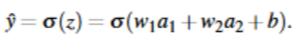

Graphically, this appears as:

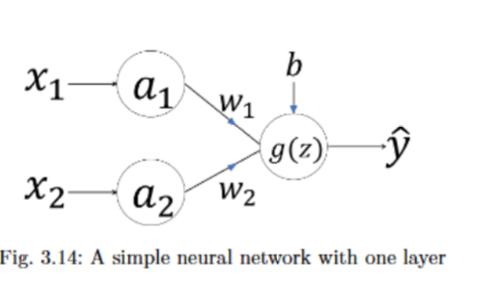

Here, the **weights** (*wi*) and the **bias** (*b*) will be found numerically in order to best fit the forecast output with the given data.

An **activation function** in a neural network is a mathematical function applied to the output of a neuron to introduce non-linearity into the model. **Forward propagation** is the process in a neural network where the input data is passed through the network's layers to generate an output.

The below example defines a sigmoid activation function, performs forward propogation and then uses **mean square error loss function** to measure the difference between the model's prediction and the actual output.

Predicted output:
[[0.76852478]
 [0.47502081]
 [0.73105858]]

Mean Squared Error Loss:
0.11718501210361933


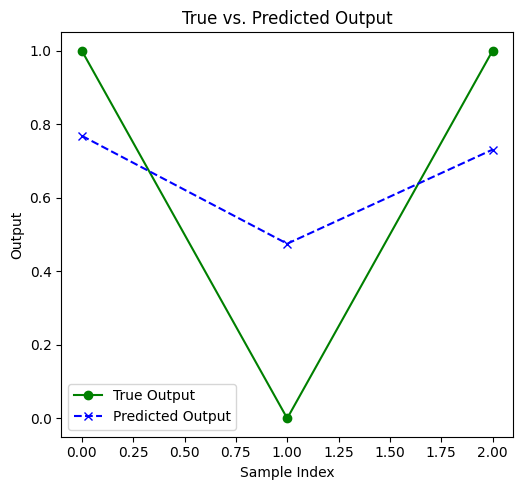

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# mean squared error loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# forward propagation
def forward_propagation(X, weights, bias):
    z = np.dot(X, weights) + bias
    a = sigmoid(z)
    return a

# dataset
X = np.array([[0.5, 1.5], [1.0, -1.0], [1.5, 0.5]])
y_true = np.array([[1], [0], [1]])  # true output

# weights and bias- in this case, randomly chosed
weights = np.array([[0.4], [0.6]])
bias = 0.1

y_pred = forward_propagation(X, weights, bias)
loss = mean_squared_error(y_true, y_pred)

print("Predicted output:")
print(y_pred)
print("\nMean Squared Error Loss:")
print(loss)
plt.figure(figsize=(10, 5))

# compare true and predicted output
plt.subplot(1, 2, 1)
plt.plot(y_true, label='True Output', marker='o', linestyle='-', color='green')
plt.plot(y_pred, label='Predicted Output', marker='x', linestyle='--', color='blue')
plt.title('True vs. Predicted Output')
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.legend()
plt.tight_layout()
plt.show()


# **3.7.2 Activation Functions**
In neural networks, the **activation function** of a node abstracts the output of that node given an input or set of inputs for specific purposes. In biological neural networks, the activation function may represent a mechanism that determines when a neuron fires. There are a number of different activation functions:

1.**Step Function:**

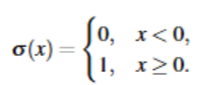

This is also called the Heaviside step function, or the unit step function. It often represents a signal that switches on at a specified time and stays switched on indefinitely. The step function can be used for classification problems.

2. **Rectified Linear Units (ReLU):**

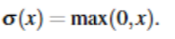

This is one of the most commonly used activation functions. It was found to enable better training of deeper networks compared to other widely used activation functions. Rectified linear units, compared to sigmoid functions or similar activation functions, allows for faster and more effective training of deep neural architectures on large and complex datasets.

3. **Sigmoid:**

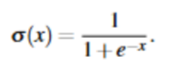

This logistic function finds applications in a range of fields, including biomathematics. The logistic sigmoid can be used in the output layer for predicting probability.

4. **Softmax Functions:**

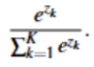

The softmax function converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector.






The following program demonstrated multiple activation functions with plots to visualize how each function behaves.


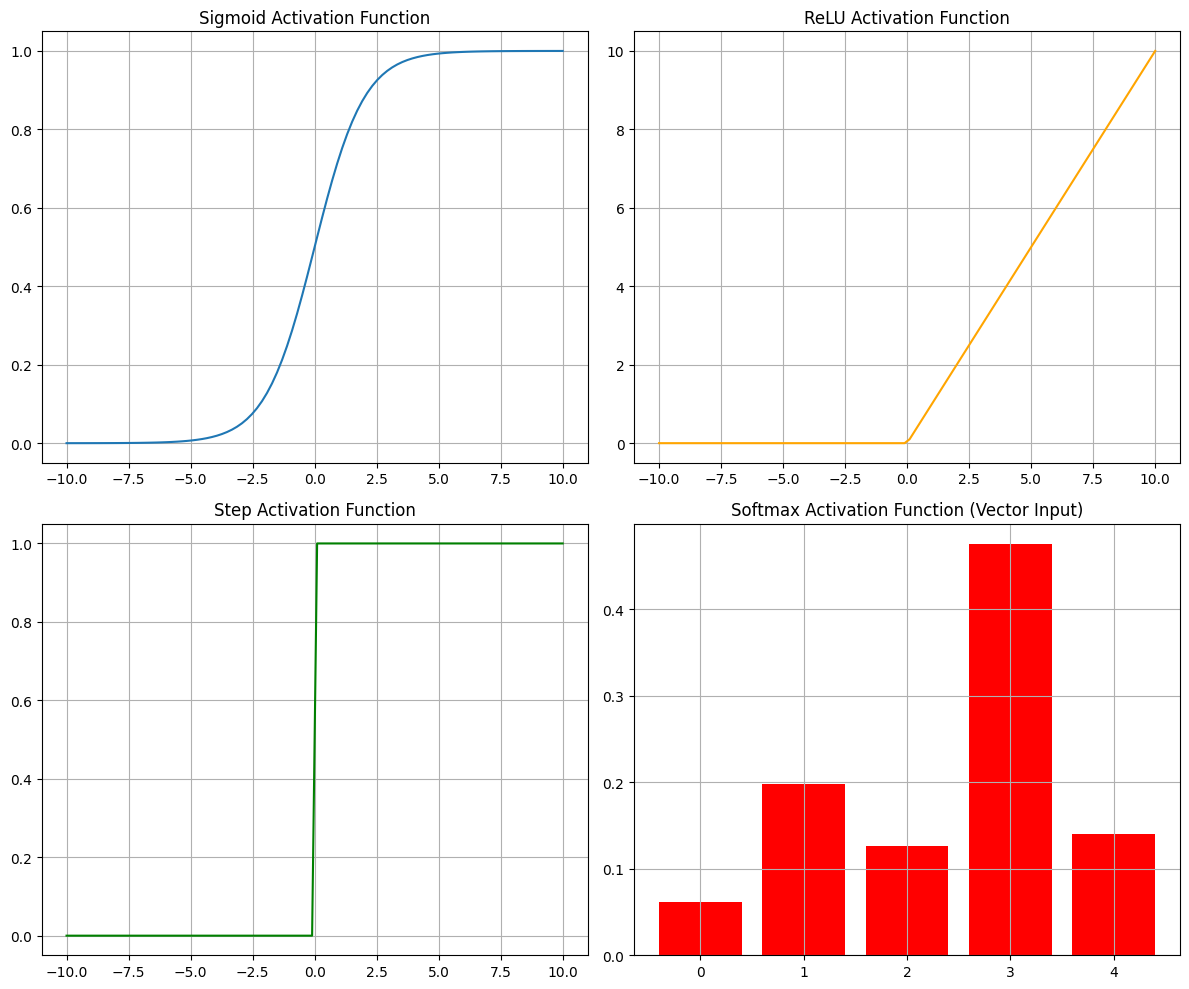

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0, keepdims=True)

# relu function
def relu(x):
    return np.maximum(0, x)

# step function
def step(x):
    return np.where(x >= 0, 1, 0)

# array of values
x = np.linspace(-10, 10, 100)
sigmoid_output = sigmoid(x)
relu_output = relu(x)
step_output = step(x)


x_softmax = np.random.randn(5)
softmax_output = softmax(x_softmax)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# plot sigmoid
axs[0, 0].plot(x, sigmoid_output, label="Sigmoid")
axs[0, 0].set_title("Sigmoid Activation Function")
axs[0, 0].grid(True)

# plot relu
axs[0, 1].plot(x, relu_output, label="ReLU", color="orange")
axs[0, 1].set_title("ReLU Activation Function")
axs[0, 1].grid(True)

# plot step
axs[1, 0].plot(x, step_output, label="Step", color="green")
axs[1, 0].set_title("Step Activation Function")
axs[1, 0].grid(True)

# plot softmax
axs[1, 1].bar(np.arange(len(x_softmax)), softmax_output, label="Softmax", color="red")
axs[1, 1].set_title("Softmax Activation Function (Vector Input)")
axs[1, 1].grid(True)
plt.tight_layout()
plt.show()


# **3.7.3 Cost Function**

A **cost function** is a mathematical function used in machine learning and neural networks to measure how well a model's prediction matches the actual target values. It quantifies the error between the predicted output and the true output, guiding the optimization process during the model training.

We define the cost function as:

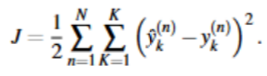

There are different types of cost functions:

1. **Mean Squared Error (MSE)**: It measures the average squared difference between the predicted and actual values.

2. **Binary Cross-Entropy**: It measures the difference between the predicted and actual values in terms of probabilities.

3. **Categorical Cross-Entropy**: It measures the difference between the predicted and actual values in terms of probabilities.


The following coding example calculates the mean squared error and categorical cross-entropy for sample data.

In [20]:
import numpy as np

# MSE function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# cross entropy loss function
def cross_entropy_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# sample data
y_true_regression = np.array([3.0, -0.5, 2.0, 7.0])
y_pred_regression = np.array([2.5, 0.0, 2.1, 7.8])

# calculate MSE
mse = mean_squared_error(y_true_regression, y_pred_regression)
print("Mean Squared Error (Regression):", mse)

y_true_classification = np.array([1, 0, 1, 1])
y_pred_classification = np.array([0.9, 0.1, 0.8, 0.7])

# calculate cross entropy loss
cross_entropy = cross_entropy_loss(y_true_classification, y_pred_classification)
print("Cross-Entropy Loss (Classification):", cross_entropy)


Mean Squared Error (Regression): 0.2874999999999999
Cross-Entropy Loss (Classification): 0.19763488164214868


# **3.7.4 Backpropogation**
**Backpropagation** is an essential algorithm in training artificial neural networks. It allows the network to adjust its parameters (weights and biases) by calculating the gradient of the cost function with respect to each parameter, which helps in minimizing the overall error during training.

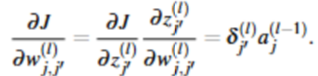

Thus, by using the chain rule, backpropogation works by calculating the loss backwards, layer by layer, in the neural network.

The following coding example uses backpropogation to minimize the error during training. We use MSE to quantify error.

Epoch 0, Loss: 0.21944017975456542
Epoch 1000, Loss: 0.06701266966208336
Epoch 2000, Loss: 0.011129383708316894
Epoch 3000, Loss: 0.004505044448460141
Epoch 4000, Loss: 0.002611667280107922
Epoch 5000, Loss: 0.001780793005065985
Epoch 6000, Loss: 0.0013285835640078666
Epoch 7000, Loss: 0.0010489617915743939
Epoch 8000, Loss: 0.0008608941361864898
Epoch 9000, Loss: 0.0007266589742223609
Final predicted outputs:
[[5.01853088e-04]
 [2.50166156e-02]
 [2.50389252e-02]
 [9.64596612e-01]]


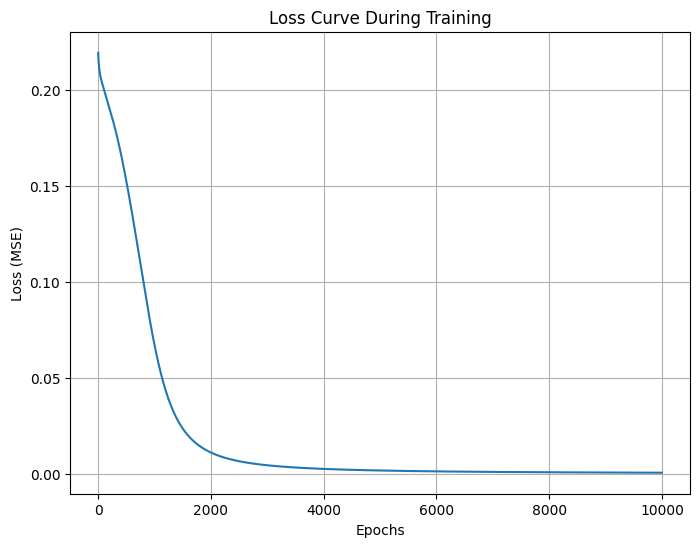

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# MSE loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return y_pred - y_true

# training data
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0], [0], [0], [1]])

# network parameters
input_layer_size = 2
hidden_layer_size = 4
output_layer_size = 1
np.random.seed(42)
weights_input_hidden = np.random.randn(input_layer_size, hidden_layer_size)
bias_hidden = np.zeros((1, hidden_layer_size))
weights_hidden_output = np.random.randn(hidden_layer_size, output_layer_size)
bias_output = np.zeros((1, output_layer_size))

# training parameters
learning_rate = 0.1
epochs = 10000

# loss values
losses = []

# training using back propogation
for epoch in range(epochs):
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # calculate MSE
    loss = mse_loss(y, predicted_output)
    losses.append(loss)
    output_layer_error = mse_loss_derivative(y, predicted_output) * sigmoid_derivative(predicted_output)
    hidden_layer_error = output_layer_error.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # update weights
    weights_hidden_output -= hidden_layer_output.T.dot(output_layer_error) * learning_rate
    bias_output -= np.sum(output_layer_error, axis=0, keepdims=True) * learning_rate

    weights_input_hidden -= X.T.dot(hidden_layer_error) * learning_rate
    bias_hidden -= np.sum(hidden_layer_error, axis=0, keepdims=True) * learning_rate

    # loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# final predicted outputs
print("Final predicted outputs:")
print(predicted_output)

#loss curve
plt.figure(figsize=(8, 6))
plt.plot(losses)
plt.title('Loss Curve During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()




As you can see, loss decreases with increasing epochs through backpropagation.

# **3.7.5 Backpropagation Algorithm**

We can derive the backpropagation algorithm as follows:
1. We initialize weights and biases, typically at random.
2. We can pick input data and input the vector *x* into the left side of the network and calculate all the outputs.
3. We can calculate the output *y*, and we can now update the parameters by the gradient descent.

In [19]:
import numpy as np

# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# MSE
def mse_loss(y_true, y_pred):
    return 0.5 * np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return y_pred - y_true

# input data
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

# model parameters
np.random.seed(42)
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1
W1 = np.random.randn(input_layer_size, hidden_layer_size)
b1 = np.zeros((1, hidden_layer_size))
W2 = np.random.randn(hidden_layer_size, output_layer_size)
b2 = np.zeros((1, output_layer_size))

learning_rate = 0.1
epochs = 10000

# training
for epoch in range(epochs):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)
    loss = mse_loss(y, y_pred)

    # backpropagation
    dL_dz2 = mse_loss_derivative(y, y_pred) * sigmoid_derivative(y_pred)
    dL_dW2 = np.dot(a1.T, dL_dz2)
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)
    dL_da1 = np.dot(dL_dz2, W2.T)
    dL_dz1 = dL_da1 * sigmoid_derivative(a1)
    dL_dW1 = np.dot(X.T, dL_dz1)
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

    # update weights and biases
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2
    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1

    # print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

print("Final predicted outputs:")
print(y_pred)





Epoch 0, Loss: 0.1279149709722184
Epoch 1000, Loss: 0.12470282978275618
Epoch 2000, Loss: 0.12272232579859904
Epoch 3000, Loss: 0.1023536652035721
Epoch 4000, Loss: 0.07660202684985383
Epoch 5000, Loss: 0.06934573007385969
Epoch 6000, Loss: 0.06679681660925879
Epoch 7000, Loss: 0.06557556090634002
Epoch 8000, Loss: 0.06487458024192594
Epoch 9000, Loss: 0.06442454482585563
Final predicted outputs:
[[0.05300868]
 [0.49554213]
 [0.95091319]
 [0.50319888]]


Like in the previous computational example, loss decreases through backpropagation training.